# Machine Learning course - KNN
## Assgnment 3

### Import libraries

In [156]:
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Data processing (Haberman)

In [157]:
file_path = 'haberman.data'
h_data = pd.read_csv(file_path)
h_data.columns = ['x', 'y', 'z', 'label']
h_data.head()

,x,y,z,label
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


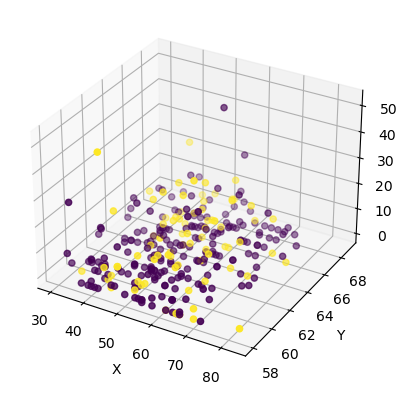

In [158]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Use the 'label' column as color
ax.scatter(h_data['x'], h_data['y'], h_data['z'], c=h_data['label'])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

### Helper functions

In [159]:
def manhattan_distance(v1, v2): # l1 norm
    return np.sum(np.abs(v1 - v2))

manhattan_distance(np.array([3, 1]), np.array([6,3]))

5

In [160]:
def euclidean_distance(v1, v2): # l2 norm
    return np.sqrt(np.sum((v1 - v2)**2))

euclidean_distance(np.array([3, 1]), np.array([6,3]))

3.605551275463989

In [161]:
def frechet_distance(v1,v2): # l∞ norm
    return  np.max(np.abs(v1 - v2))

frechet_distance(np.array([3, 1]), np.array([6,3]))

3

In [162]:
class KNN:
    def __init__(self, k=1, distance_f = None):
        self.k = k
        self.distance_f = distance_f

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [self.distance_f(x, x_train) for x_train in self.X_train]
        # Sort by distance and return indices of the first k neighbors
        k_indices = np.argsort(distances)[:self.k]
        # Extract the labels of the k nearest neighbor training samples
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Majority vote, most common class label
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]


In [163]:

def compute_error(y_test, y_pred):
    return np.mean(y_test != y_pred)

### Main function

In [164]:
def execute_knn(data,n_runs , ks, distance_f):
    X = data.iloc[:, :-1]
    y = data['label']
    
    
    empirical_errors = [['' for _ in range(len(distance_f))] for _ in range(len(ks))]
    true_errors = [['' for _ in range(len(distance_f))] for _ in range(len(ks))]
    
    for index,k in enumerate(ks):
        for index2,f in enumerate(distance_f):
            e_errors = []
            t_errors = []
            for i in range(n_runs):
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=i)
                clf = KNN(k=k, distance_f=f)
                clf.fit(X_train.to_numpy(), y_train.to_numpy())
                
                # Predict on the training set for empirical error
                y_train_pred = clf.predict(X_train.to_numpy())
                empirical_error = compute_error(y_train.to_numpy(), y_train_pred)
                e_errors.append(empirical_error)

                # Predict on the test set for true error
                y_test_pred = clf.predict(X_test.to_numpy())
                true_error = compute_error(y_test.to_numpy(), y_test_pred)
                t_errors.append(true_error)
                
            empirical_errors[index][index2] = np.mean(e_errors)
            true_errors[index][index2] = np.mean(t_errors)

    
    return empirical_errors, true_errors

### Results analysis (Haberman)

In [165]:
def plot_knn_results(empirical_errors, true_errors, ks, distance_functions):
    # Create subplots
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))

    # Define the labels for the distance functions
    distance_labels = [func.__name__ for func in distance_functions]

    # Plot empirical errors
    for idx, label in enumerate(distance_labels):
        ax[0].plot(ks, empirical_errors[:, idx], label=label)
    ax[0].set_title('Average Empirical Errors')
    ax[0].set_xlabel('Number of Neighbors: k')
    ax[0].set_ylabel('Error')
    ax[0].legend()
    ax[0].grid(True)

    # Plot true errors
    for idx, label in enumerate(distance_labels):
        ax[1].plot(ks, true_errors[:, idx], label=label)
    ax[1].set_title('Average True Errors')
    ax[1].set_xlabel('Number of Neighbors: k')
    ax[1].set_ylabel('Error')
    ax[1].legend()
    ax[1].grid(True)

    # Show the plot
    plt.tight_layout()
    plt.show()


In [166]:
def print_knn_results(empirical_errors, true_errors, ks, distance_functions):
    # Convert function objects to names for printing
    distance_labels = [func.__name__ for func in distance_functions]

    print("KNN Classification Results:")
    print("---------------------------------\n")

    # Loop through each combination of k and distance function
    for k_idx, k in enumerate(ks):
        for f_idx, f_label in enumerate(distance_labels):
            print(f"Results for k={k}, using {f_label}:")
            print(f"    Average Empirical Error: {empirical_errors[k_idx][f_idx]:.3f}")
            print(f"    Average True Error: {true_errors[k_idx][f_idx]:.3f}\n")

In [167]:
ks = [1,3,5,7,9]
distance_f = [manhattan_distance, euclidean_distance, frechet_distance]
empirical_errors, true_errors = execute_knn(h_data, 100 , ks, distance_f)


KNN Classification Results:
---------------------------------

Results for k=1, using manhattan_distance:
    Average Empirical Error: 0.010
    Average True Error: 0.334

Results for k=1, using euclidean_distance:
    Average Empirical Error: 0.010
    Average True Error: 0.323

Results for k=1, using frechet_distance:
    Average Empirical Error: 0.010
    Average True Error: 0.330

Results for k=3, using manhattan_distance:
    Average Empirical Error: 0.170
    Average True Error: 0.292

Results for k=3, using euclidean_distance:
    Average Empirical Error: 0.164
    Average True Error: 0.297

Results for k=3, using frechet_distance:
    Average Empirical Error: 0.165
    Average True Error: 0.291

Results for k=5, using manhattan_distance:
    Average Empirical Error: 0.200
    Average True Error: 0.270

Results for k=5, using euclidean_distance:
    Average Empirical Error: 0.203
    Average True Error: 0.275

Results for k=5, using frechet_distance:
    Average Empirical Error:

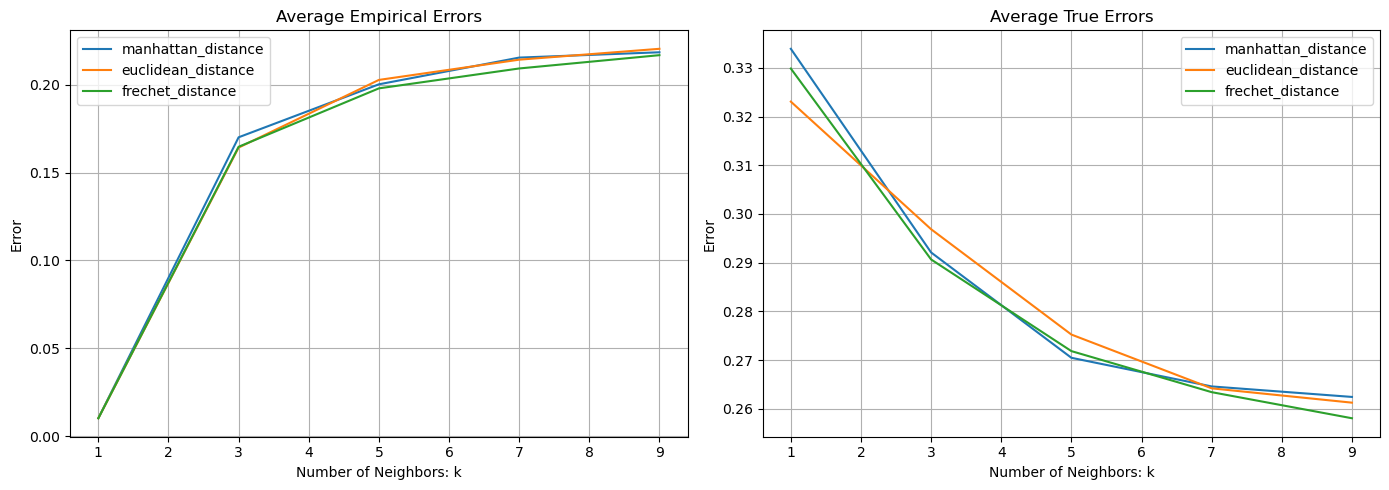

In [168]:
print_knn_results(np.array(empirical_errors), np.array(true_errors), ks, distance_f)
plot_knn_results(np.array(empirical_errors), np.array(true_errors), ks, distance_f)


1. Best Parameters of k and p:
* The best performance is given by k=9 with frechet_distance (p=∞), which has the lowest average true error of 0.258.

2. Interpretation of Results:
* The empirical error starts very low at k=1 but increases with the value of k. This is indicative of the model becoming less flexible with a larger neighborhood, as it begins to smooth over the training data and potentially generalize better.
* The true error decreases as k increases, reaching the lowest value at k=9. This suggests that for this dataset, a larger neighborhood helps in making more robust predictions that are less sensitive to the noise in the data.
* The euclidean_distance (p=2) and frechet_distance (p=∞) seem to perform similarly across different values of k, but the manhattan_distance (p=1) consistently has a slightly higher true error rate.

3. Overfitting:
* Overfitting is typically indicated by a low empirical error and a high true error. In this case, the empirical error is not extremely low for k=1, suggesting that overfitting is not a major concern for this dataset with the k-NN algorithm.
* As k increases and the empirical error goes up, the true error goes down, which is the opposite of what would happen if the model were overfitting. Instead, this suggests that the model is becoming more generalized and performs better on unseen data as k increases.

It's clear from the results that as k increases, the model becomes more accurate on the unseen data for the Haberman dataset. A k value of 9 with the frechet_distance seems to be the most effective combination of parameters. This is indicative of a dataset that may have some level of complexity or noise that is better captured by looking at a larger number of neighbors to determine the class of a new point.

### Data processing (Circle separator)

In [169]:
file_path = 'circle_separator.txt'
c_data = pd.read_csv(file_path, header=None, sep=' ', names=['x', 'y', 'label']) # load data by splitting on space and naming columns
c_data.head()

,x,y,label
0,-0.17,0.64,1
1,-1.92,-0.42,-1
2,1.24,0.46,1
3,-1.81,-0.95,-1
4,-0.58,0.62,1


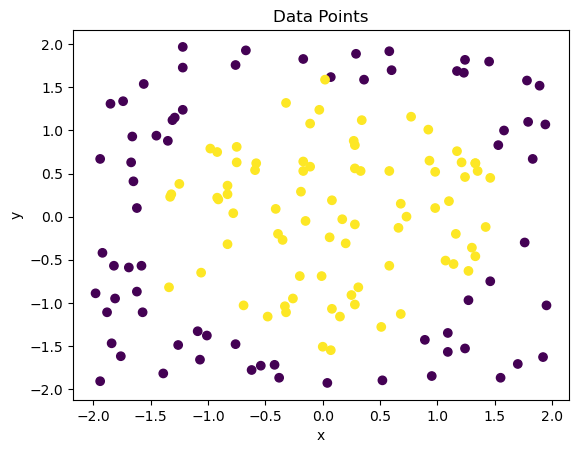

In [170]:
plt.scatter(data['x'], data['y'], c=data['label'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data Points')
plt.show()

### Results analysis (Circle separator)

In [171]:
empirical_errors, true_errors = execute_knn(c_data, 100 , ks, distance_f)

KNN Classification Results:
---------------------------------

Results for k=1, using manhattan_distance:
    Average Empirical Error: 0.000
    Average True Error: 0.071

Results for k=1, using euclidean_distance:
    Average Empirical Error: 0.000
    Average True Error: 0.067

Results for k=1, using frechet_distance:
    Average Empirical Error: 0.000
    Average True Error: 0.076

Results for k=3, using manhattan_distance:
    Average Empirical Error: 0.032
    Average True Error: 0.087

Results for k=3, using euclidean_distance:
    Average Empirical Error: 0.028
    Average True Error: 0.083

Results for k=3, using frechet_distance:
    Average Empirical Error: 0.031
    Average True Error: 0.088

Results for k=5, using manhattan_distance:
    Average Empirical Error: 0.052
    Average True Error: 0.105

Results for k=5, using euclidean_distance:
    Average Empirical Error: 0.050
    Average True Error: 0.096

Results for k=5, using frechet_distance:
    Average Empirical Error:

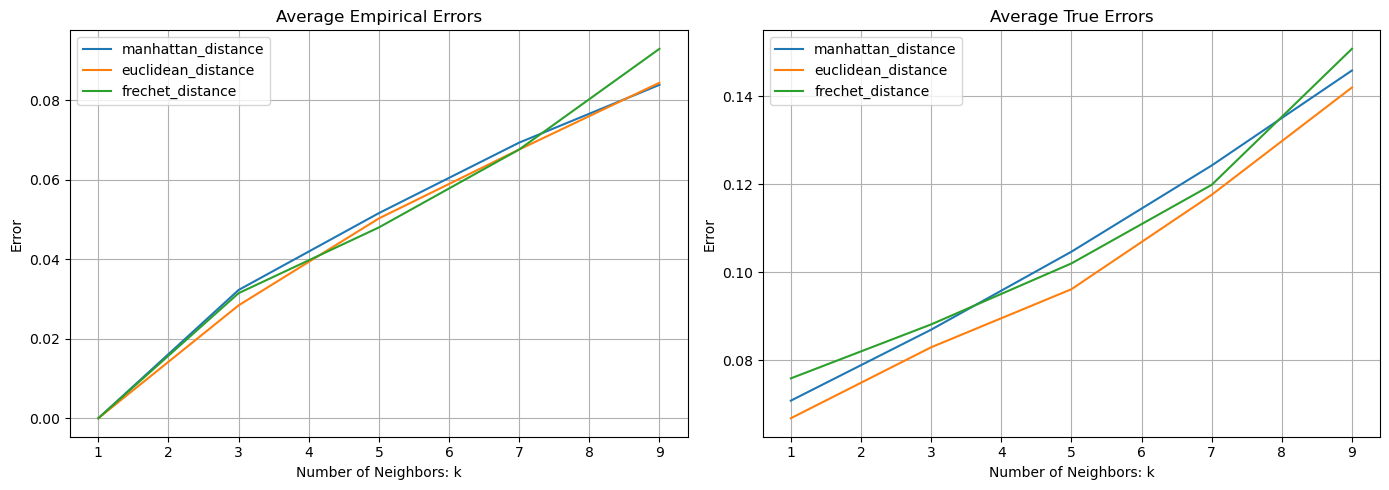

In [172]:
print_knn_results(np.array(empirical_errors), np.array(true_errors), ks, distance_f)
plot_knn_results(np.array(empirical_errors), np.array(true_errors), ks, distance_f)


1. Best Parameters of k and p:
* The lowest average true error is observed at k=1 using euclidean_distance (p=2), with an error of 0.067.

2. Interpretation of Results:
* The empirical error is zero for all distance functions when k=1, which typically indicates that each point is correctly classified by its nearest neighbor. Given the nature of the circle separator dataset, which likely has a clear boundary between classes, this isn't surprising.
* As k increases, both empirical and true errors increase. This suggests that adding more neighbors dilutes the predictive power for this particular dataset, which is consistent with the expectation that the circle separator dataset has a strong spatial structure that is best captured with fewer neighbors.
* The increase in error with higher values of k indicates that the decision boundary is becoming too generalized, moving away from the optimal complex shape required to separate the classes accurately.

3. Overfitting:
* Overfitting is not evident in the results for k=1, as the true error is also the lowest at this point. This indicates that the model with k=1 is not just memorizing the training data but also generalizing well to unseen data.
* The consistent increase in true error as k grows suggests that the model is moving from a well-fitted scenario towards underfitting the data, where the model becomes too simple to capture the underlying patterns.

In summary, for the circle separator dataset, a 1-NN classifier using euclidean_distance seems to be the optimal choice, given its low true error. This suggests that the nearest neighbor provides the most relevant information for predicting the class of a data point, which is typical for datasets with clear class separations.

In conclusion, the differences in the k-NN results reflect the distinct characteristics of each dataset. The Haberman dataset appears to have more complex patterns and possibly overlapping classes, while the circle separator dataset seems to have a clear spatial separation between classes.